# machine_learning_newton_ring
>牛顿环中心坐标估算主程序

In [1]:
# 加载依赖项
from cv2 import data
import mindspore.dataset as ds
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import random
from numpy.lib.type_check import imag

In [2]:
# 自定义项

# mindspore自定义数据集生成器
class DatasetGenerator:
    def __init__(self):
        img = np.array(Image.open("../data/img/train_img_1.jpg"))
        path = "../data/img/train_img_"
        for img_i in range(3049):
            img_nxt = np.array(Image.open(path+str(img_i+2)+".jpg"))
            if img_i == 0:
                img = np.stack((img,img_nxt))
            else:
                img_nxt = img_nxt[np.newaxis, :]
                img = np.vstack((img, img_nxt))
        self.data = img
        ct = np.load("../data/center/center.npy")
        self.label = ct

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

In [3]:
# 生成、加载./data中的数据
dataset_generator = DatasetGenerator()
dataset = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=False)

print("\n01 ---dataset generate complete---\n")

# 全部打印
# for data in dataset.create_dict_iterator():
#     print('{}'.format(data["data"]), '{}'.format(data["label"]))

# 创建数据集的迭代器p_data
p_data = dataset.create_dict_iterator()


01 ---dataset generate complete---



(224, 224) [123  93]


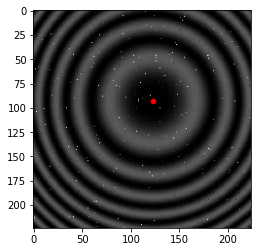

(224, 224) [110 137]


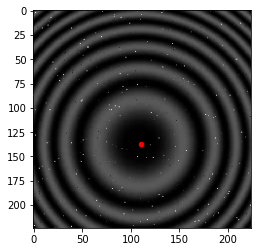

(224, 224) [112 125]


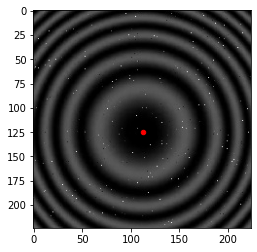

In [4]:
# 选前三组数据和标签打印，检查是否加载正确
test_p_data = dataset.create_dict_iterator(output_numpy=True)
for i in range(3):
    test_data = next(test_p_data)
    num = random.randint(1,3050)
    # print('{}'.format(test_data["data"].shape), '{}'.format(test_data["label"])) #打印数据
    img = test_data["data"]
    ct = test_data["label"]
    print(img.shape, ct)
    plt.imshow(img, cmap="gray")
    plt.scatter(int(test_data["label"][0]), int(test_data["label"][1]), color='r',s=20)
    plt.show()  #打印图像